In [153]:
# ========================================
# IMPORT LIBRARIES
# ========================================
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_selection import VarianceThreshold

In [199]:
# ========================================
# IMPORT DATAFRAME
# ========================================
df = pd.read_csv('data/df01.csv', sep=',', na_filter=False, index_col=0, parse_dates=['launched_at'])

In [200]:
df.isnull().sum().sum()

0

In [201]:
df.isna().sum().sum()

0

In [202]:
df.columns[0:14]

Index(['id', 'launch_state', 'launched_at', 'category', 'country', 'goal',
       'backers_count', 'pledged_ratio', 'funding_days', 'staff_pick',
       'spotlight', 'comics', 'crafts', 'dance'],
      dtype='object')

In [204]:
# ========================================
# VARIABLE REDUCTION
# ========================================
info_variables = ['id','launched_at','category','country']

In [205]:
# ---- ZERO-VARIANCE ----
sel = VarianceThreshold(threshold=0.0)

In [206]:
sel.fit_transform(X=df.drop(columns=info_variables)).shape

(173887, 215)

In [207]:
df.drop(columns=info_variables).shape

(173887, 215)

In [81]:
# there are no zero-variance variables

*\# NEAR-ZERO VARIANCE*

There is much discussion about whether such variables should be removed - there are times where even very low variance variables have a large effect in predicting the outcome. We will keep these.

In [208]:
# ---- VARIABLE-OUTCOME CORRELATIONS ----
corr_threshold = 0.5

In [92]:
dftest = pd.DataFrame({'state':[0,1,0,1], 'spotlight':[0,1,0,1], 'days':[1,10,100,1000]})
dftest

,state,spotlight,days
0,0,0,1
1,1,1,10
2,0,0,100
3,1,1,1000


In [93]:
dftest.corr()

,state,spotlight,days
state,1.000000,1.000000,0.542642
spotlight,1.000000,1.000000,0.542642
days,0.542642,0.542642,1.000000


In [96]:
dftest['state'].corr(dftest['spotlight'])

1.0

In [97]:
dftest['state'].corr(dftest['days'])

0.5426422775636054

In [138]:
dftest.corr().drop(columns='state').iloc[0]

spotlight    1.000000
days         0.542642
Name: state, dtype: float64

In [209]:
df.drop(columns=info_variables).corr().drop(columns='launch_state').iloc[0]

goal            -0.034373
backers_count    0.115215
pledged_ratio    0.016668
funding_days    -0.098283
staff_pick       0.251567
spotlight        1.000000
comics           0.106614
crafts          -0.048837
dance            0.061359
design           0.020498
fashion          0.016958
film & video     0.009997
food            -0.126937
games            0.019431
journalism      -0.093388
music            0.078656
photography     -0.026630
publishing       0.085045
technology      -0.145246
theater          0.067869
AF               0.003649
AG               0.000795
AL              -0.000494
AM              -0.001888
AQ               0.001962
AR               0.001122
AT              -0.011944
AU              -0.041496
AX               0.002934
AZ              -0.002772
                   ...   
SV              -0.000726
SX              -0.003921
SY               0.001124
SZ               0.004149
TC              -0.003921
TH              -0.004759
TJ               0.002074
TL          

In [210]:
df_corr_variable_outcome = pd.DataFrame(abs(df.drop(columns=info_variables).corr().drop(columns='launch_state').iloc[0])).reset_index()

In [211]:
df_corr_variable_outcome.columns = ['variable','corr_launch_state']

In [212]:
df_corr_variable_outcome.head()

,variable,corr_launch_state
0,goal,0.034373
1,backers_count,0.115215
2,pledged_ratio,0.016668
3,funding_days,0.098283
4,staff_pick,0.251567


In [213]:
df_corr_variable_outcome.sort_values(by='corr_launch_state', ascending=False).head()

,variable,corr_launch_state
5,spotlight,1.000000
4,staff_pick,0.251567
18,technology,0.145246
12,food,0.126937
1,backers_count,0.115215


In [152]:
# Looks like we do have some high correlation.

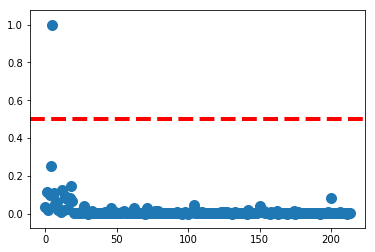

In [218]:
plt.scatter(x=df_corr_variable_outcome.index,y=df_corr_variable_outcome['corr_launch_state'], s=100)
plt.axhline(y=0.5, color='r', linestyle='--', linewidth=4)

In [219]:
df_corr_variable_outcome[df_corr_variable_outcome['corr_launch_state'] > 0.5]['variable']

5    spotlight
Name: variable, dtype: object

In [195]:
# The only variable of interest here is spotlight. From https://techcrunch.com/2015/03/25/kickstarter-spotlight/, 
# we see that spotlight happens for successfully funded projects and acts as a way to update the project timeline.
# It clearly does nothing in helping predict funding success; drop it.

In [190]:
df.columns.shape

(219,)

In [191]:
df.columns[0:14]

Index(['id', 'launch_state', 'launched_at', 'category', 'country', 'goal',
       'backers_count', 'pledged_ratio', 'funding_days', 'staff_pick',
       'spotlight', 'comics', 'crafts', 'dance'],
      dtype='object')

In [192]:
df.drop(columns='spotlight', inplace=True)

In [193]:
df.columns.shape

(218,)

In [194]:
df.columns[0:14]

Index(['id', 'launch_state', 'launched_at', 'category', 'country', 'goal',
       'backers_count', 'pledged_ratio', 'funding_days', 'staff_pick',
       'comics', 'crafts', 'dance', 'design'],
      dtype='object')

In [20]:
# Variable-variable correlation data

In [21]:
df.head(1)

,id,launch_state,launched_at,category,country,goal,backers_count,pledged_ratio,funding_days,staff_pick,...,VE,VI,VN,VU,WS,XK,YE,ZA,ZM,ZW
0,895922629,0,2014-10-28 19:42:54,technology,US,3500.0,1,0.014286,30,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df.drop(df.columns[11:], axis=1).drop(columns=['id','launched_at','category','country']).head(1)

,launch_state,goal,backers_count,pledged_ratio,funding_days,staff_pick,spotlight
0,0,3500.0,1,0.014286,30,0,0


In [36]:
df.drop(df.columns[11:], axis=1).drop(columns=['id','launched_at','category','country']).corr()

,launch_state,goal,backers_count,pledged_ratio,funding_days,staff_pick,spotlight
launch_state,1.000000,-0.034373,0.115215,0.016668,-0.098283,0.251567,1.000000
goal,-0.034373,1.000000,0.009228,-0.000705,0.026012,-0.006075,-0.034373
backers_count,0.115215,0.009228,1.000000,0.010888,0.006374,0.152003,0.115215
pledged_ratio,0.016668,-0.000705,0.010888,1.000000,-0.004361,0.001973,0.016668
funding_days,-0.098283,0.026012,0.006374,-0.004361,1.000000,-0.009698,-0.098283
staff_pick,0.251567,-0.006075,0.152003,0.001973,-0.009698,1.000000,0.251567
spotlight,1.000000,-0.034373,0.115215,0.016668,-0.098283,0.251567,1.000000


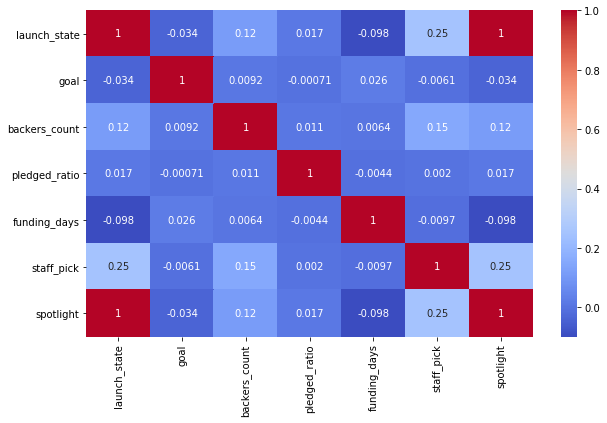

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(df.drop(df.columns[11:], axis=1).drop(columns=['id','launched_at','category','country']).corr(), cmap='coolwarm', annot=True)

In [38]:
# It looks like spotlight is very highly correlated with launch_state; we need to drop it.